In [35]:
import os
from scipy.stats import multivariate_normal
import numpy as np
import matplotlib.pyplot as plt
import torch, torchvision
import sys
sys.path.insert(0, '..')
import src.util as uti
import src.input_generator as inge
import matplotlib.animation as animation

In [2]:
configs_random = [(f'corr {corr:.01f}',corr) for corr in np.arange(0.,1.05,0.05)]

In [3]:
def generate_random_variables(N=int(1e5), corr=0., means=[0.0, 0.0], stds=[1.0, 1.0], train_test_split=None):

    cov = [[stds[0]**2, stds[0]*stds[1]*corr], [stds[0]*stds[1]*corr, stds[1]**2]]
    normal = multivariate_normal(means, cov, allow_singular=True) 
    A, B = normal.rvs(size=N).astype(np.float32).T
    A = torch.from_numpy(A).unsqueeze(-1).to(uti.device)
    B = torch.from_numpy(B).unsqueeze(-1).to(uti.device)

    return A[:train_test_split], B[:train_test_split], A[train_test_split:], B[train_test_split:]

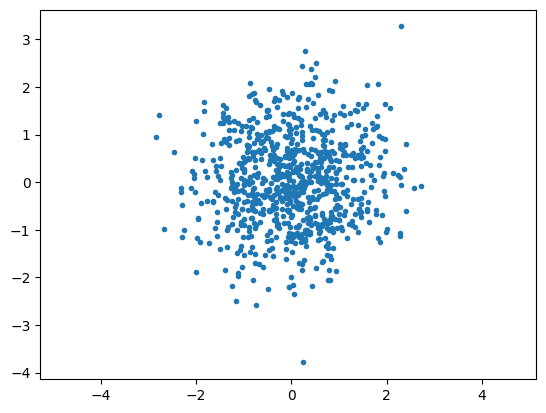

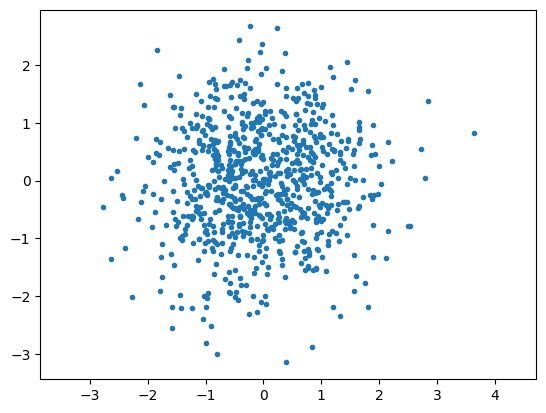

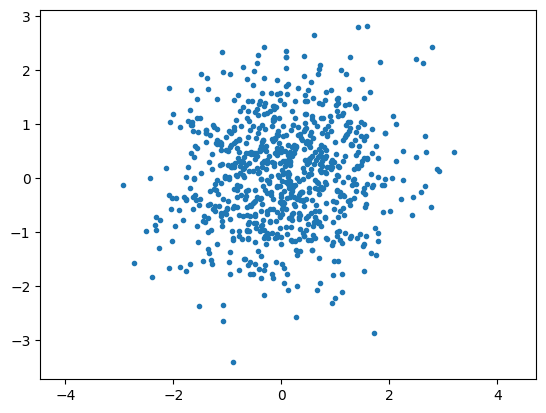

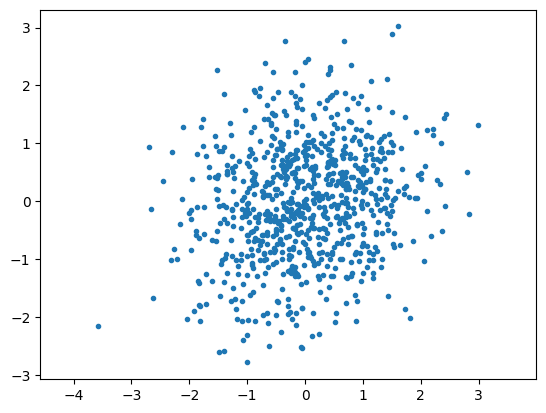

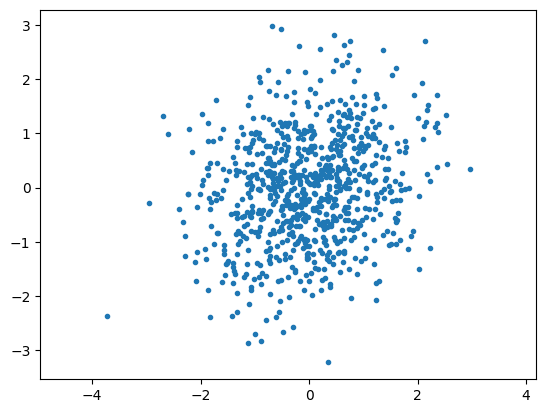

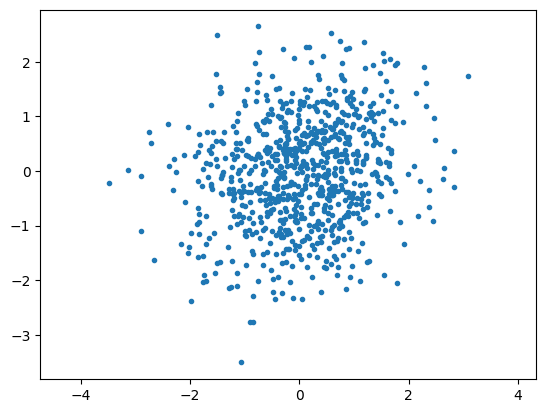

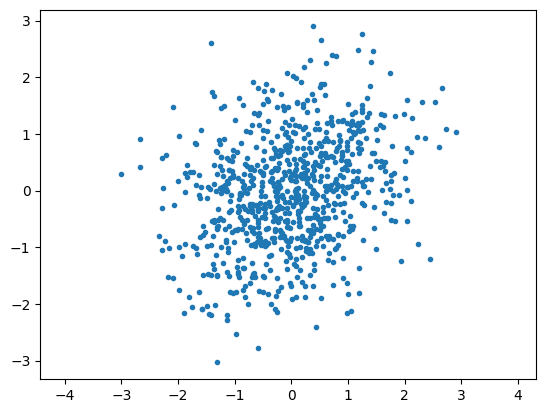

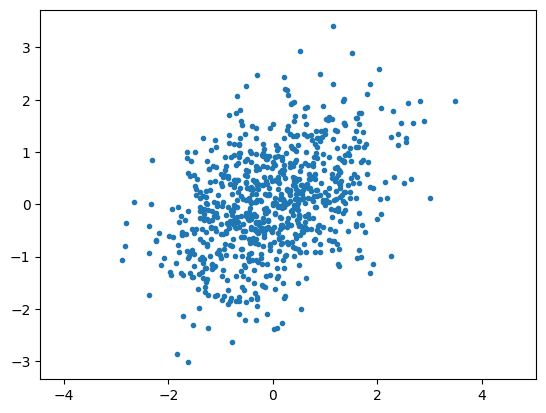

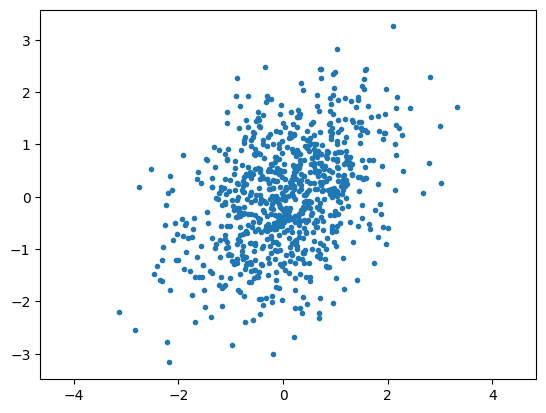

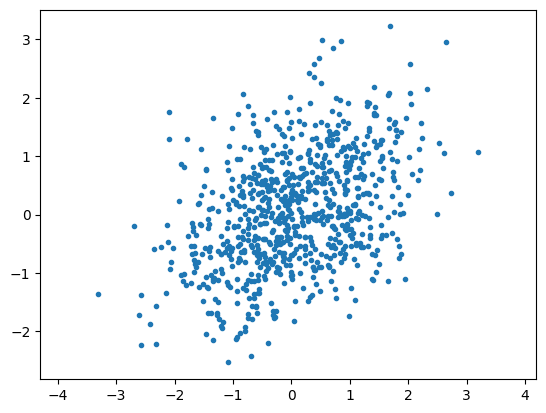

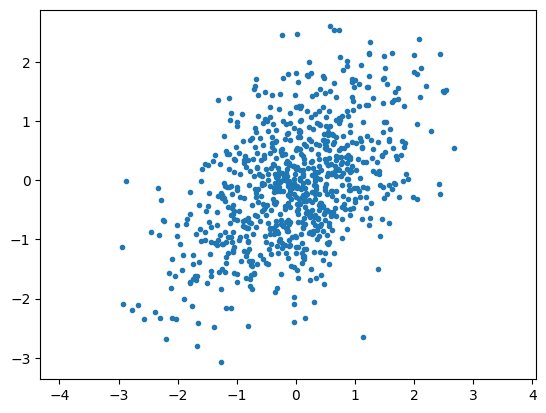

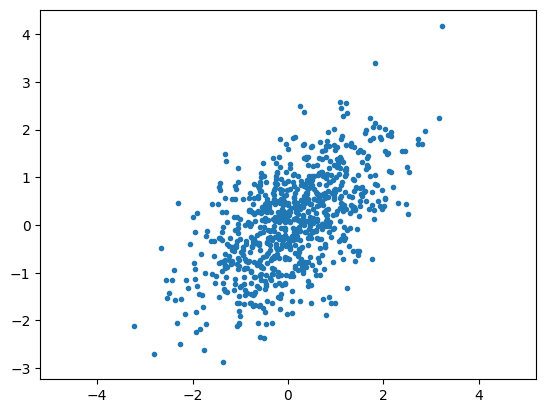

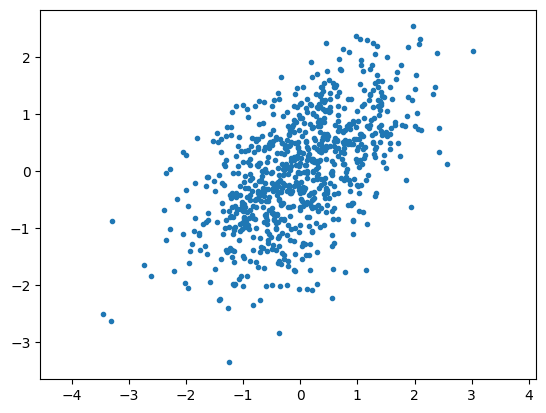

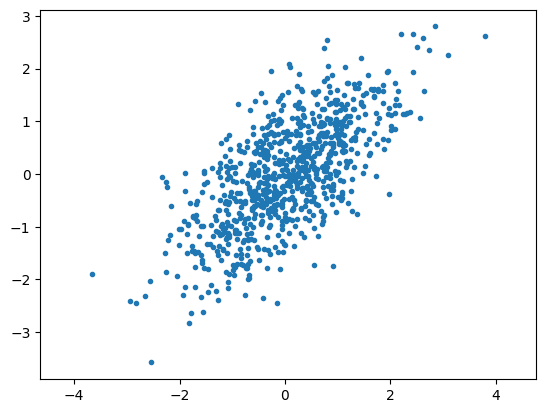

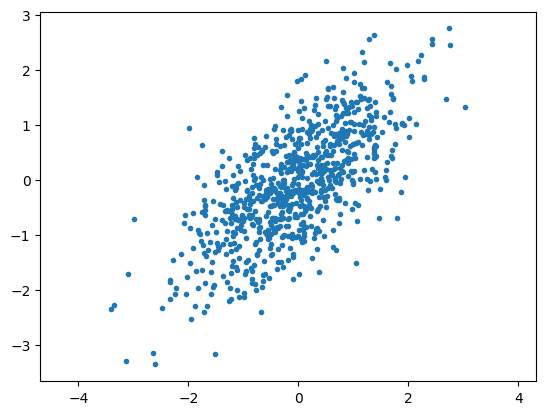

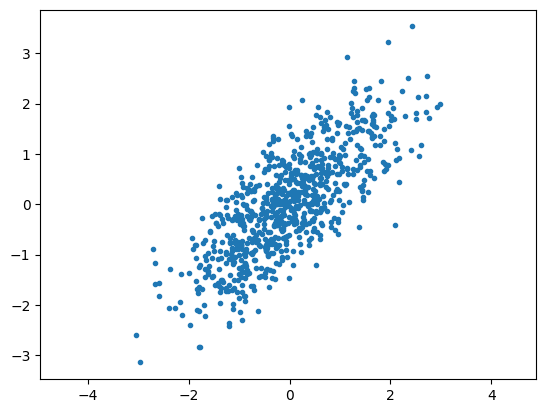

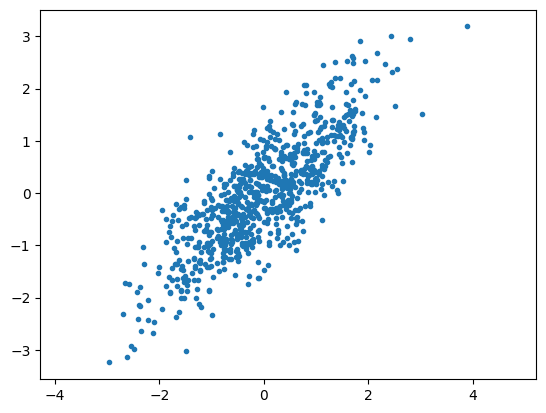

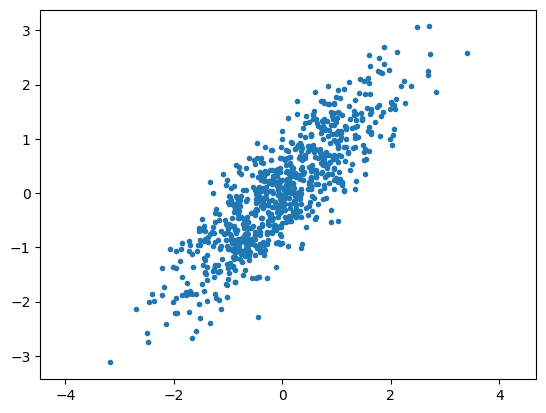

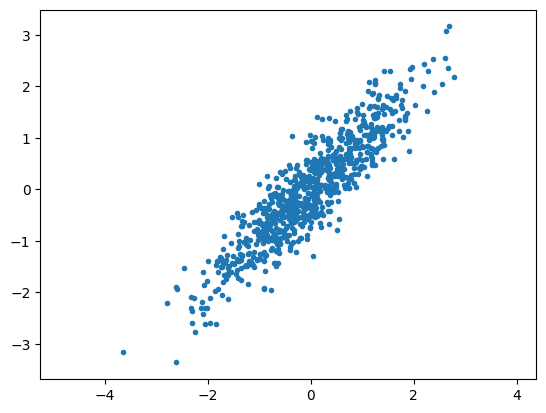

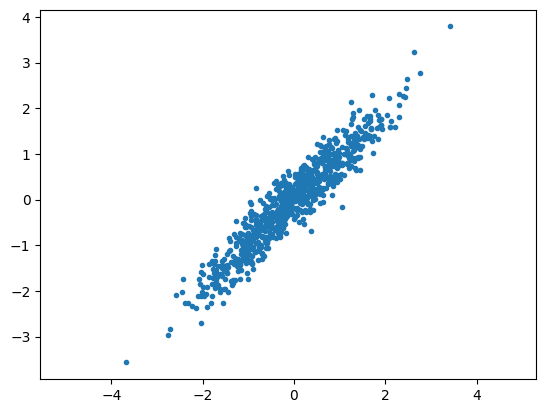

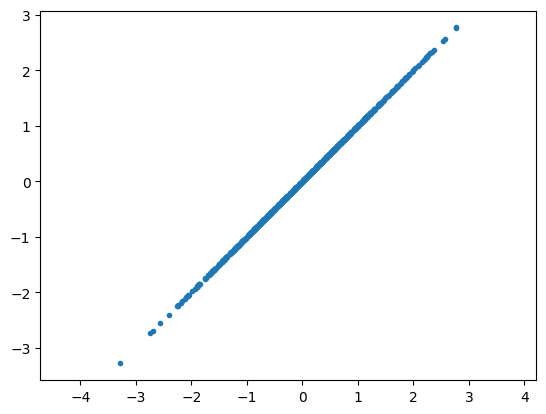

In [4]:
for config_name, corr in configs_random:
    A_train, B_train, A_test, B_test = generate_random_variables(800, corr)
    plt.figure()
    plt.plot(A_train, B_train, '.')
    plt.axis('equal')
    plt.show()

In [5]:
import matplotlib
%matplotlib notebook

In [6]:
import pandas as pd
file_path = '../results/results.h5'
df = pd.read_pickle(file_path)

In [7]:
df.columns

Index(['name', 'corr', 'train ml mi', 'train appr mi', 'train true mi',
       'test ml mi', 'test appr mi', 'test true mi'],
      dtype='object')

<IPython.core.display.Javascript object>


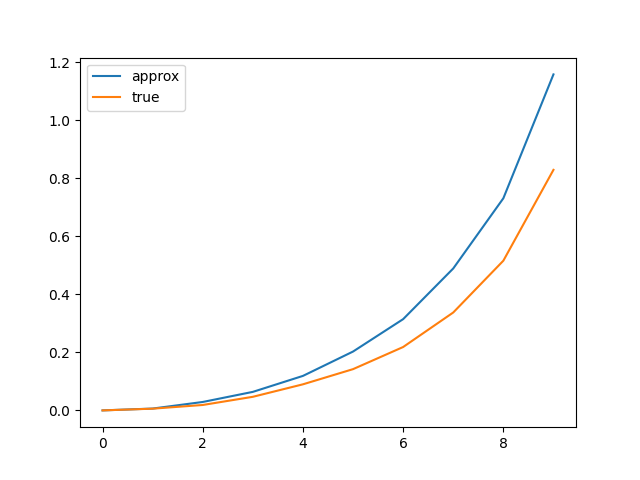

In [20]:
fig, ax = plt.subplots()
aa = ax.plot(df['train ml mi'],label='approx')[0]
bb = ax.plot(df['train true mi'],label='true')[0]
ax.legend()

In [22]:
aa

In [23]:
bb

In [9]:
aa.set_ydata(df['train ml mi'][:3])

In [10]:
df.index[:3]

RangeIndex(start=0, stop=3, step=1)

In [11]:
t = np.linspace(0, len(df), 1)

In [12]:
df['corr'].iloc[-1]

0.9

<IPython.core.display.Javascript object>


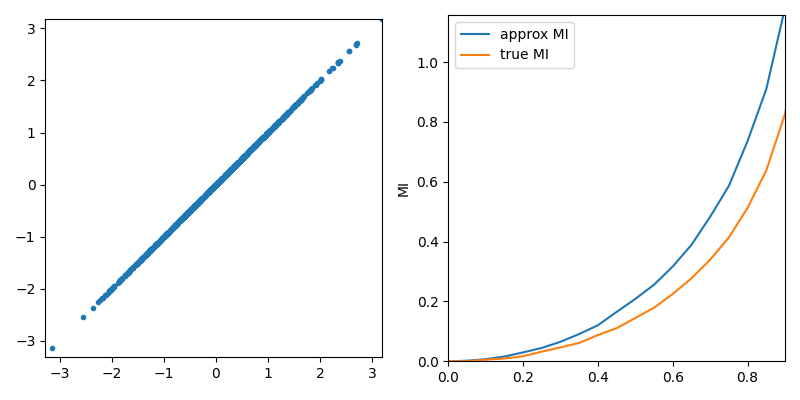

In [25]:
fig, ax = plt.subplots(1,2,figsize=(8,4))
A_train, B_train, A_test, B_test = inge.generate_random_variables(800, 0)
ll1 = ax[0].plot(A_train, B_train, '.')[0]
ll2 = ax[1].plot(df['train ml mi'][0],label='approx MI')[0]
ll3 = ax[1].plot(df['train true mi'][0],label='true MI')[0]
ax[0].set_aspect('equal')
ax[1].set(xlim=[0, df['corr'].iloc[-1]], ylim=[0,df['train ml mi'].max()], ylabel='MI')
ax[1].legend()
plt.tight_layout()

def update(frame):
    corr = df['corr'][frame]
    A_train, B_train, A_test, B_test = inge.generate_random_variables(800, corr)
    ll1.set_xdata(A_train)
    ll1.set_ydata(B_train)
    ll2.set_xdata(df['corr'][:frame])
    ll2.set_ydata(df['train ml mi'][:frame])
    ll3.set_xdata(df['corr'][:frame])
    ll3.set_ydata(df['train true mi'][:frame])
    return ll1, ll2, ll3


ani = animation.FuncAnimation(fig=fig, func=update, frames=len(df), interval=400, repeat=False)
plt.show()

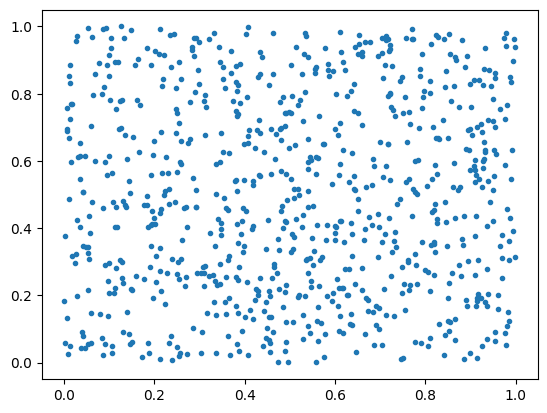

In [7]:
fig2, ax2 = plt.subplots()
t = np.linspace(0, 3, 40)
g = -9.81
v0 = 12
z = g * t**2 / 2 + v0 * t

v02 = 5
z2 = g * t**2 / 2 + v02 * t
line2 = ax2.plot(np.random.rand(800),np.random.rand(800), '.')[0]


def update2(frame):
    label, corr = configs_random[frame]
    A_train, B_train, A_test, B_test = inge.generate_random_variables(800, corr)
    line2.set_xdata(A_train)
    line2.set_ydata(B_train)
    return line2


ani = animation.FuncAnimation(fig=fig2, func=update2, frames=40, interval=30)
plt.show()

<IPython.core.display.Javascript object>


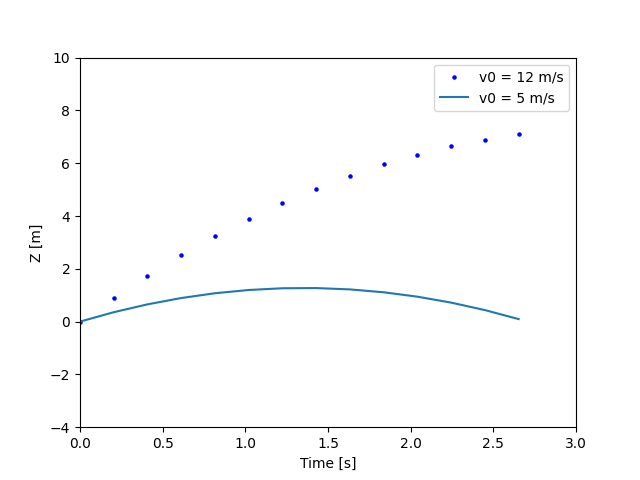

In [35]:
fig, ax = plt.subplots()
t = np.linspace(0, 3, 40)
g = -9.81
v0 = 12
z = g * t**2 / 2 + v0 * t

v02 = 5
z2 = g * t**2 / 2 + v02 * t

scat = ax.scatter(t[0], z[0], c="b", s=5, label=f'v0 = {v0} m/s')
line2 = ax.plot(t[0], z2[0], label=f'v0 = {v02} m/s')[0]
ax.set(xlim=[0, 3], ylim=[-4, 10], xlabel='Time [s]', ylabel='Z [m]')
ax.legend()


def update(frame):
    # for each frame, update the data stored on each artist.
    x = t[:frame]
    y = z[:frame]
    # update the scatter plot:
    data = np.stack([x, y]).T
    scat.set_offsets(data)
    # update the line plot:
    line2.set_xdata(t[:frame])
    line2.set_ydata(z2[:frame])
    return (scat, line2)


ani = animation.FuncAnimation(fig=fig, func=update, frames=40, interval=30)
plt.show()

In [63]:
np.arange(0.,1.1,0.05)

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  , 1.05])

<IPython.core.display.Javascript object>


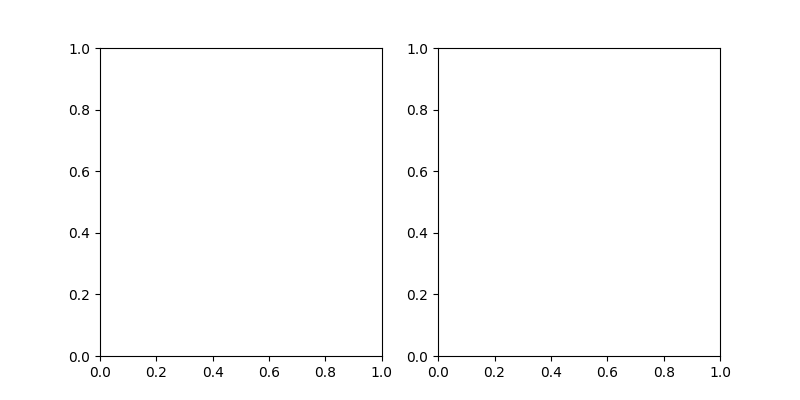

In [26]:
fig = plt.subplots(1,2,figsize=(8,4))

In [29]:
type(fig[1])

numpy.ndarray

In [54]:
class Animator():

    def __init__(self,result_df,N):
        self.result_df = result_df
        self.fig, self.axs = plt.subplots(1,2,figsize=(8,4))
        A_train, B_train, A_test, B_test = inge.generate_random_variables(N=N, corr=0)
        self.ll1 = self.axs[0].plot(A_train, B_train, '.')[0]
        self.ll2 = self.axs[1].plot(result_df['train ml mi'][0],label='approx MI')[0]
        self.ll3 = self.axs[1].plot(result_df['train true mi'][0],label='true MI')[0]
        self.axs[0].set_aspect('equal')
        self.axs[1].set(xlim=[0, result_df['corr'].iloc[-1]], ylim=[0,result_df['train ml mi'].max()*1.1], ylabel='MI')
        self.axs[1].legend()
        plt.tight_layout() 

    def animate(self,frame):

        corr = self.result_df['corr'][frame]
        A_train, B_train, A_test, B_test = inge.generate_random_variables(800, corr)
        self.ll1.set_xdata(A_train)
        self.ll1.set_ydata(B_train)
        self.ll2.set_xdata(self.result_df['corr'][:frame+1])
        self.ll2.set_ydata(self.result_df['train ml mi'][:frame+1])
        self.ll3.set_xdata(self.result_df['corr'][:frame+1])
        self.ll3.set_ydata(self.result_df['train true mi'][:frame+1])
        return self.ll1, self.ll2, self.ll3


In [55]:
result_path = '../results/results_random.h5'

<IPython.core.display.Javascript object>


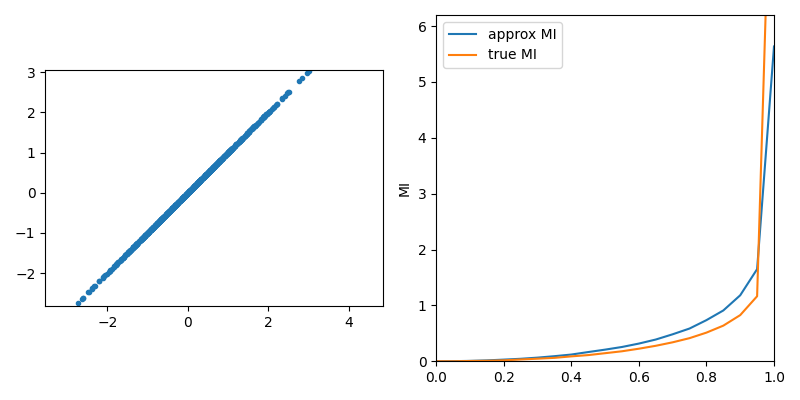

In [56]:
df = pd.read_pickle(result_path)

N = 800
animator = Animator(df,N)
animObj = animation.FuncAnimation(animator.fig, animator.animate, frames=len(df), repeat=False, interval=300, blit=True)
plt.show()

In [45]:
df['train ml mi'].max()

5.635240593525344

In [47]:
df['train ml mi']

0    -0.000004
1     0.001778
2     0.007046
3     0.015900
4     0.029684
5     0.044586
6     0.065157
7     0.091223
8     0.120459
9     0.165057
10    0.208438
11    0.255949
12    0.316936
13    0.389299
14    0.483192
15    0.586317
16    0.736471
17    0.909791
18    1.181356
19    1.649435
20    5.635241
Name: train ml mi, dtype: float64

In [48]:
len(df)

21

In [57]:
result_path = '../results/results_calo.h5'

In [63]:
df = pd.read_pickle(result_path)
df = df.drop('corr', axis=1)
df = df.drop('train appr mi', axis=1)
df = df.drop('test appr mi', axis=1)

In [65]:
df

,name,train ml mi,train true mi,test ml mi,test true mi,train E res,test E res
0,good calo,1.803879,1.792482,2.225151,1.735144,6.549377,5.896169
1,bad calo,0.639313,0.806602,0.960435,0.805445,2.328517,2.303910
